In [96]:
### libraries for snowflake access
import os
import sys
project_home = '/Users/adityajoshi/git_repos/shopify_kaggle'
sys.path.append(project_home)
from utils import snowflake_connection as sc
from importlib import reload

### Computational libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
categories = sc.get_dataframe('select * from shopify.categories')

done


In [65]:
def category_summary_stats_query():
    return """
select
    categories.title as category_title
    ,count(distinct apps.id) as app_count
    
    -- ratings
    ,sum(apps.rating) as summed_app_ratings
    ,median(apps.rating) as median_app_rating
    ,summed_app_ratings/app_count as avg_rating_per_app
    
    -- reviews
    ,sum(apps.reviews_count) as total_reviews_count
    ,median(apps.reviews_count) as median_review_count
    ,total_reviews_count/app_count as avg_no_reviews_per_app
    ,count(distinct reviews.author) as reviewer_count
    
from shopify.apps as apps
    join shopify.apps_categories as category_map
        on apps.id = category_map.app_id
        
    join shopify.categories as categories
        on category_map.category_id = categories.id
        
    left join shopify.reviews_trunc as reviews
        on apps.id = reviews.app_id
    
group by
    category_title
    
order by
    app_count desc    
"""

In [66]:
def app_count_query():
    return """
select
    count(distinct apps.id) as app_count
from shopify.apps as apps
"""

In [71]:
def reviewer_count_query():
    return """
select
    count(distinct reviews.author) as reviewer_count
from shopify.reviews_trunc as reviews
"""

In [72]:
css = sc.get_dataframe(category_summary_stats_query())
total_app_count = sc.get_dataframe(app_count_query())
total_reviewer_count = sc.get_dataframe(reviewer_count_query())

done
done
done


In [68]:
css

,CATEGORY_TITLE,APP_COUNT,SUMMED_APP_RATINGS,MEDIAN_APP_RATING,AVG_RATING_PER_APP,TOTAL_REVIEWS_COUNT,MEDIAN_REVIEW_COUNT,AVG_NO_REVIEWS_PER_APP,REVIEWER_COUNT
0,Store design,2087,1257731.2,4.8,602.650311,1158225358,1525.000,554971.422137,201080
1,Sales and conversion optimization,1294,916577.0,4.8,708.328439,1019459485,1806.000,787835.768934,155131
2,Marketing,1068,876161.5,4.7,820.375936,1007913331,2173.000,943739.073970,149155
3,Orders and shipping,858,167424.3,4.7,195.133217,28969513,283.000,33764.001166,33111
4,Customer support,409,132944.5,4.7,325.047677,32775839,842.000,80136.525672,26510
5,Reporting,350,65812.0,4.8,188.034286,12249494,583.000,34998.554286,13344
6,Inventory management,342,59735.8,4.8,174.666082,4102017,239.000,11994.201754,12239
7,Productivity,282,60547.2,4.8,214.706383,8038468,397.000,28505.205674,12430
8,Finding and adding products,252,115815.2,4.4,459.584127,27881284,631.000,110640.015873,24722
9,Finances,163,29226.9,4.8,179.306135,2313158,213.000,14191.153374,6097


In [104]:
max(app_count['APP_COUNT'])


4750

In [73]:
total_reviewer_count

,REVIEWER_COUNT
0,299315


In [30]:
css['Percent of Total Distinct Apps'] = css['APP_COUNT']/max(app_count['APP_COUNT'])

In [33]:
css.sort_values(by=['Percent of Total Distinct Apps'], ascending=True)

,CATEGORY_TITLE,APP_COUNT,SUMMED_APP_RATINGS,MEDIAN_APP_RATING,AVG_RATING_PER_APP,TOTAL_REVIEWS_COUNT,MEDIAN_REVIEW_COUNT,AVG_NO_REVIEWS_PER_APP,Percent of Total Distinct Apps
11,Places to sell,127,436.9,4.30,3.440157,11097,9.000,87.377953,0.026737
10,Trust and security,144,479.4,4.50,3.329167,10608,5.000,73.666667,0.030316
9,Finances,163,538.1,4.60,3.301227,6310,4.000,38.711656,0.034316
8,Finding and adding products,252,832.9,4.10,3.305159,26274,9.500,104.261905,0.053053
7,Productivity,282,922.3,4.50,3.270567,13182,4.000,46.744681,0.059368
6,Inventory management,342,1142.9,4.45,3.341813,13173,5.000,38.517544,0.072000
5,Reporting,350,1112.1,4.50,3.177429,14090,3.000,40.257143,0.073684
4,Customer support,409,1326.2,4.50,3.242543,28673,4.000,70.105134,0.086105
3,Orders and shipping,858,2674.6,4.30,3.117249,37139,4.000,43.285548,0.180632
2,Marketing,1068,3792.2,4.60,3.550749,187234,8.000,175.312734,0.224842


In [36]:
css_trunc = css[['CATEGORY_TITLE'
     ,'APP_COUNT'
     ,'MEDIAN_APP_RATING'
     ,'AVG_RATING_PER_APP'
     ,'MEDIAN_REVIEW_COUNT'
     ,'AVG_NO_REVIEWS_PER_APP'
     ,'Percent of Total Distinct Apps' ]].copy()

In [37]:
css_trunc

,CATEGORY_TITLE,APP_COUNT,MEDIAN_APP_RATING,AVG_RATING_PER_APP,MEDIAN_REVIEW_COUNT,AVG_NO_REVIEWS_PER_APP,Percent of Total Distinct Apps
0,Store design,2087,4.70,3.587494,6.000,128.087207,0.439368
1,Sales and conversion optimization,1294,4.70,3.589490,7.000,149.962133,0.272421
2,Marketing,1068,4.60,3.550749,8.000,175.312734,0.224842
3,Orders and shipping,858,4.30,3.117249,4.000,43.285548,0.180632
4,Customer support,409,4.50,3.242543,4.000,70.105134,0.086105
5,Reporting,350,4.50,3.177429,3.000,40.257143,0.073684
6,Inventory management,342,4.45,3.341813,5.000,38.517544,0.072000
7,Productivity,282,4.50,3.270567,4.000,46.744681,0.059368
8,Finding and adding products,252,4.10,3.305159,9.500,104.261905,0.053053
9,Finances,163,4.60,3.301227,4.000,38.711656,0.034316


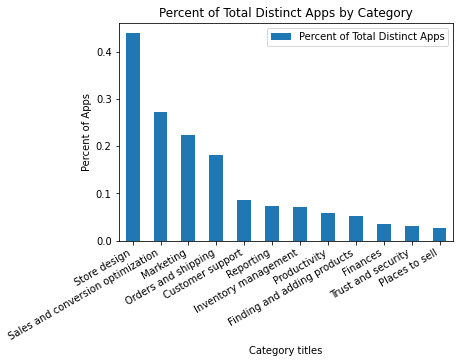

In [47]:
ax = css_trunc.plot.bar(x='CATEGORY_TITLE', y='Percent of Total Distinct Apps')
plt.xlabel('Category titles')
plt.ylabel('Percent of Apps')
plt.title('Percent of Total Distinct Apps by Category')
plt.xticks(rotation=30, ha='right')
plt.show()

In [55]:
def categories_per_app_hist_query():
    return """
with
categories_per_app as (
select
    apps.id as appl_id
    ,count(distinct category_mapping.category_id) as category_count    
  
from shopify.apps as apps
    join shopify.apps_categories as category_mapping
        on apps.id = category_mapping.app_id
  
group by
    apps.id
)
select
    categories_per_app.category_count
    ,count(distinct categories_per_app.appl_id) as app_count
    ,app_count/4750 as percent_of_apps
    
from categories_per_app

group by
    categories_per_app.category_count
    
order by
    categories_per_app.category_count asc
"""

In [58]:
cat_app_hist = sc.get_dataframe(categories_per_app_hist_query())

done


In [63]:
cat_app_hist['CATEGORY_COUNT'] = pd.to_numeric(cat_app_hist['CATEGORY_COUNT'])
cat_app_hist['PERCENT_OF_APPS'] = pd.to_numeric(cat_app_hist['PERCENT_OF_APPS'])

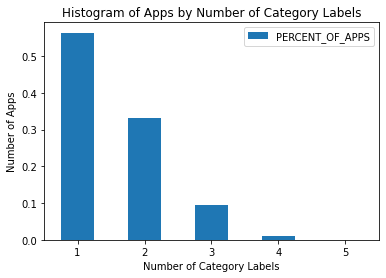

In [64]:
ax2 = cat_app_hist.plot.bar(x='CATEGORY_COUNT', y='PERCENT_OF_APPS', rot=0)
plt.xlabel('Number of Category Labels')
plt.ylabel('Number of Apps')
plt.title('Histogram of Apps by Number of Category Labels')
plt.show()

In [80]:
reload(code)

<module 'code' from '/Users/adityajoshi/.pyenv/versions/3.8.2/lib/python3.8/code.py'>

In [86]:
from code import processing_and_visuals

ImportError: cannot import name 'processing_and_visuals' from 'code' (/Users/adityajoshi/.pyenv/versions/3.8.2/lib/python3.8/code.py)

In [87]:
import processing_and_charts

done


In [88]:
from code import processing_and_charts as visuals

ImportError: cannot import name 'processing_and_charts' from 'code' (/Users/adityajoshi/.pyenv/versions/3.8.2/lib/python3.8/code.py)

In [89]:
import code

In [99]:
reload(code)
from code import processing_and_charts

ImportError: cannot import name 'processing_and_charts' from 'code' (/Users/adityajoshi/.pyenv/versions/3.8.2/lib/python3.8/code.py)

In [101]:
import processing_and_charts

In [134]:
def app_rating_histogram_query(category=None):
    if category is None: return
    return """
select

    apps.id as appl_id
    ,max(apps.rating) as avg_rating
    ,(case
        when avg_rating = 0 then '0'
        when avg_rating < 0.5 then '< 0.5'
        when avg_rating < 1 then '0.5 - 1'
        when avg_rating < 1.5 then '1 - 1.5'
        when avg_rating < 2 then '1.5 - 2'
        when avg_rating < 2.5 then '2 - 2.5'
        when avg_rating < 3 then '2.5 - 3'
        when avg_rating < 3.5 then '3 - 3.5'
        when avg_rating < 4 then '3.5 - 4'
        when avg_rating < 4.5 then '4 - 4.5'
        else '4.5 - 5'
      end) as avg_rating_grouped
    
from shopify.apps as apps
    join shopify.apps_categories as category_map
        on apps.id = category_map.app_id
        
    join shopify.categories as categories
        on category_map.category_id = categories.id

where 1=1
    and categories.title = 'Finances'
    
group by
    apps.id

order by avg_rating desc

""".format(category_label = category)

In [135]:
app_rating_histogram_query(category='Finances')

"\nselect\n\n    apps.id as appl_id\n    ,max(apps.rating) as avg_rating\n    ,(case\n        when avg_rating = 0 then '0'\n        when avg_rating < 0.5 then '< 0.5'\n        when avg_rating < 1 then '0.5 - 1'\n        when avg_rating < 1.5 then '1 - 1.5'\n        when avg_rating < 2 then '1.5 - 2'\n        when avg_rating < 2.5 then '2 - 2.5'\n        when avg_rating < 3 then '2.5 - 3'\n        when avg_rating < 3.5 then '3 - 3.5'\n        when avg_rating < 4 then '3.5 - 4'\n        when avg_rating < 4.5 then '4 - 4.5'\n        else '4.5 - 5'\n      end) as avg_rating_grouped\n    \nfrom shopify.apps as apps\n    join shopify.apps_categories as category_map\n        on apps.id = category_map.app_id\n        \n    join shopify.categories as categories\n        on category_map.category_id = categories.id\n\nwhere 1=1\n    and categories.title = 'Finances'\n    \ngroup by\n    apps.id\n\norder by avg_rating desc\n\n"

In [136]:
finance_apps = sc.get_dataframe(app_rating_histogram_query(category='Finances'))

done


In [137]:
finance_apps

,APPL_ID,AVG_RATING,AVG_RATING_GROUPED
0,58e0c031-1aef-4451-a7f2-76a170cc084a,5.0,4.5 - 5
1,9d6dca42-5682-47f6-bb57-560eac75acc6,5.0,4.5 - 5
2,5a898b2b-1dde-4061-8d5c-b6aab84ea2b9,5.0,4.5 - 5
3,d9af98cf-2b77-4046-86d5-b56715bb4963,5.0,4.5 - 5
4,cfb8262e-d792-4f56-951b-85fbcfc9f102,5.0,4.5 - 5
...,...,...,...
158,57fee505-391a-4199-8d88-6b3328532522,0.0,0
159,7b9bb3c5-7835-4344-8d2b-5b45e81f1b3e,0.0,0
160,05284ddc-dfed-422a-b2af-6c8063f58aa8,0.0,0
161,285b6375-07ed-4169-89e7-f9cb56e58b21,0.0,0


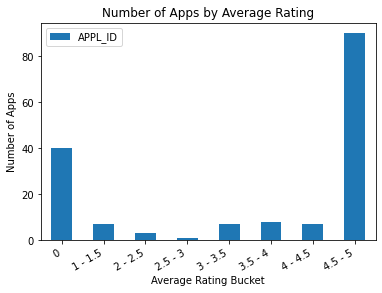

In [143]:
ax3 = pd.pivot_table(finance_apps, values='APPL_ID', index = ['AVG_RATING_GROUPED']
                     ,aggfunc=np.count_nonzero).plot.bar()
plt.xlabel('Average Rating Bucket')
plt.ylabel('Number of Apps')
plt.title('Number of Apps by Average Rating')
plt.xticks(rotation=30, ha='right')
plt.show()